In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
# Load data
df_fake = pd.read_csv('Fake.csv')
df_real = pd.read_csv('True.csv')
df_fake['label'] = 1
df_real['label'] = 0
df = pd.concat([df_fake, df_real])
df = df[['text', 'label']]

In [8]:
# Preprocess
df['text'] = df['text'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [9]:
# Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [10]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)


In [11]:
# Model
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier()

In [12]:
# Predict
y_pred = model.predict(tfidf_test)

In [13]:
# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


In [16]:
# Confusion Matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4231   16]
 [  16 4717]]


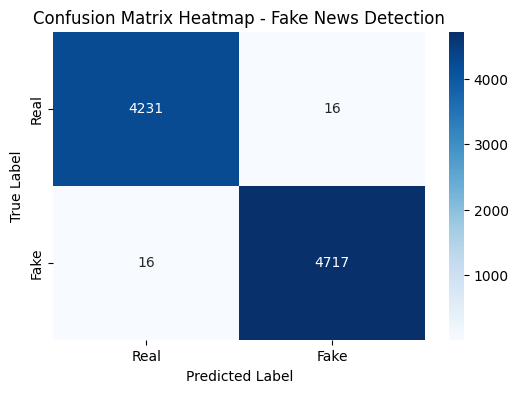

In [17]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap - Fake News Detection')
plt.show()